# Exploring Homoscedasticity and Heteroscedasticity with Python

In [255]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

mtcars = sns.load_dataset('mpg')
mtcars.head()

# Setting the seed for reproducibility
import random
random.seed(1234)

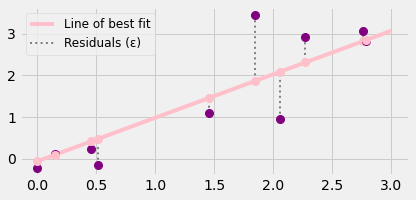

In [321]:
# Generating fake linear data
x_fake = np.linspace(0, 3, 100)
y_fake = x_fake + np.random.normal(0, 0.5, 100)
plt.figure(figsize=(6, 3))
# plt.plot(x_fake, y_fake, 'o', alpha=0.5)

# Line of best fit
sm.OLS(y_fake, sm.add_constant(x_fake)).fit().summary()

# Adding line of best fit to plot
plt.plot(x_fake, sm.OLS(y_fake, sm.add_constant(x_fake)).fit().fittedvalues, 'pink')
    
# Adding a veritcal line to the plot from the highlighted points to the line of best fit
for i in np.random.choice(range(100), 10):
    plt.plot([x_fake[i], x_fake[i]], [y_fake[i], sm.OLS(y_fake, sm.add_constant(x_fake)).fit().fittedvalues[i]], 'grey', linestyle='dotted', linewidth=2)
    plt.plot(x_fake[i], y_fake[i], 'purple', marker='o', markersize=8)
    plt.plot(x_fake[i], sm.OLS(y_fake, sm.add_constant(x_fake)).fit().fittedvalues[i], 'pink', marker='o', markersize=8)
    
# # Adding a point where the vline intersects the line of best fit
# for i in np.random.choice(range(100), 10):
    

# # Adding an annotation to the plot to mark the residual line
# plt.text(x=0.5, y=2.5, s='Residual (ε)', fontsize=12)
plt.legend(['Line of best fit', 'Residuals (ε)'], fontsize=12, loc='upper left')
plt.tight_layout()
plt.savefig('images/residuals_illustration.png', dpi=300)


In [258]:
data = mtcars[['weight', 'mpg']]
data.head()

,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0


In [259]:
import dataframe_image as dfi
dfi.export(data, './images/data.png', max_rows=5)

objc[28985]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x22dd79518) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x10d37fb58). One of the two will be used. Which one is undefined.
[0304/141628.347856:INFO:headless_shell.cc(107)] 48362 bytes written to file /var/folders/6t/_k6kmr152jq69rjlrcg91mb00000gn/T/tmpfznli4lg/temp.png


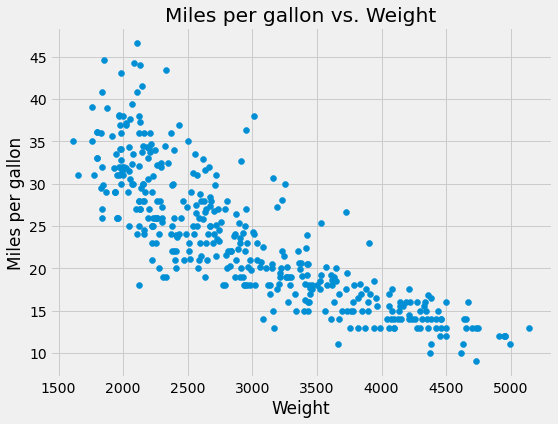

In [260]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))
plt.scatter(data['weight'], data['mpg'])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')
plt.title('Miles per gallon vs. Weight')
plt.savefig('./images/mpg_v_weight.png.png')
plt.show()



In [261]:
# model = sm.formula.ols(formula='mpg ~ weight', data=data).fit()
# print(model.summary()) # summary statistics

In [262]:
X = data['weight']
y = data['mpg']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          2.97e-103
Time:                        14:16:28   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.0

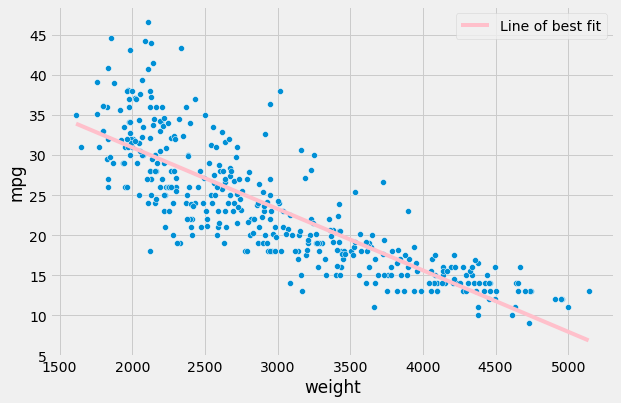

In [263]:
# PLotting the line of best fit from the model
sns.lineplot(x=data['weight'], y=model.predict(X), color='pink')
# adding the scatter plot
sns.scatterplot(x=data['weight'], y=data['mpg'])
# Adding the parameters to the plot as an annotation
plt.legend(labels=['Line of best fit'])

In [264]:
# # Plotting some residuals on the scatter plot for illustration
# # picking 5 random points
# random_points = random.sample(range(0, len(data)), 10)
# plt.scatter(data['weight'][random_points], data['mpg'][random_points], color='red')
# # Adding the line of best fit
# sns.lineplot(x=data['weight'], y=model.predict(X), color='pink')
# # Drawing the vertical line from the point to the line of best fit
# for point in random_points:
#     plt.vlines(x=data['weight'][point], ymin=data['mpg'][point], ymax=model.predict(X)[point], color='grey', linestyles='dotted')

# plt.annotate('Residual', xy=(data['weight'][random_points[0]], data['mpg'][random_points[0]]), xytext=(data['weight'][random_points[0]]+200, data['mpg'][random_points[0]]+2), arrowprops=dict(facecolor='black'))
# # Overlaying the rest of the scatter plot
# # sns.scatterplot(x=data['weight'], y=data['mpg'])
# # Adding a legeng for the vlines
# plt.xlabel('')
# # Annotating an arrow to the middle of the vline
# # plt.annotate('Residual', xy=(data['weight'][random_points[0]], data['mpg'][random_points[0]]), xytext=(data['weight'][random_points[0]]+200, data['mpg'][random_points[0]]+2), arrowprops=dict(facecolor='black', shrink=0.05))
# # Adding a brack notation the length of one of the vlines
# # plt.annotate('', xy=(data['weight'][random_points[0]], data['mpg'][random_points[0]]), xytext=(data['weight'][random_points[0]], model.predict(X)[point]), arrowprops=dict(facecolor='black', shrink=0.05))
# plt.show()



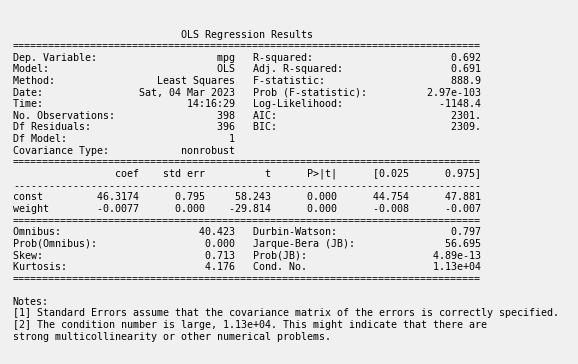

In [265]:
plt.rc('figure', figsize=(9, 6))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
# plt.tight_layout()
plt.savefig('./images/output.png')

In [266]:
# Getting the parameter estimates
print(model.params)

const     46.317364
weight    -0.007677
dtype: float64


In [267]:
# Getting the weights
weights = model.params
weights

const     46.317364
weight    -0.007677
dtype: float64

In [268]:
# # plotting the best fit line with the confidence intervals
# y_true = data['mpg']
# pred_ols = model.get_prediction(X).summary_frame(alpha=0.05)
# iv_l, iv_u = pred_ols['obs_ci_lower'], pred_ols['obs_ci_upper']


# # plt.plot(X, y, "o", label="data")
# # plt.plot(X, y_true, "b-", label="True")
# # plt.plot(X, model.fittedvalues, "r--.", label="OLS")
# plt.plot(X, iv_u, "r--")
# # plt.plot(X, iv_l, "r--")
# plt.legend(loc="best")

/Users/rogerlefort/miniforge3/envs/data-analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


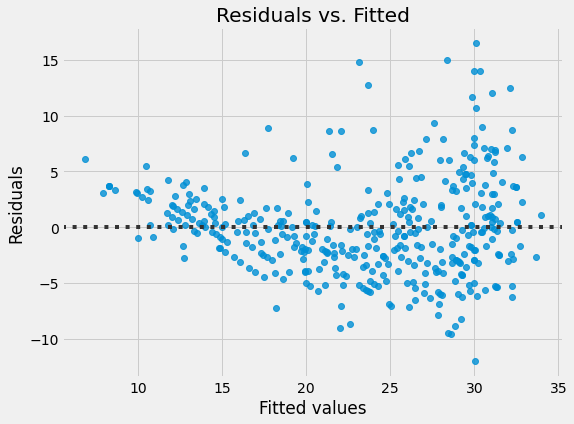

In [269]:
residuals = model.resid
fitted = model.fittedvalues

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))
sns.residplot(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.savefig('./images/residuals_v_fitted.png')
plt.show()

In [270]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan Test: p-value = ", bp_test[1])

white_test = het_white(residuals, X)
print("White Test: p-value = ", white_test[1])

# Converting the results of the tests to a dataframe
test_results = pd.DataFrame({'Test': ['Breusch-Pagan', 'White'], 'p-value': [bp_test[1], white_test[1]]})
test_results

Breusch-Pagan Test: p-value =  1.1382094674313726e-06
White Test: p-value =  5.707983055484403e-06


,Test,p-value
0,Breusch-Pagan,0.000001
1,White,0.000006


In [271]:
dfi.export(test_results, './images/test_results.png', max_rows=5)

objc[28998]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x22dd79518) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x10ab7fb58). One of the two will be used. Which one is undefined.
[0304/141629.984137:INFO:headless_shell.cc(107)] 41212 bytes written to file /var/folders/6t/_k6kmr152jq69rjlrcg91mb00000gn/T/tmpb4b_oq0d/temp.png


In [272]:
# Transforming the dependent variable
data['mpg_log'] = np.log(data['mpg'])

/var/folders/6t/_k6kmr152jq69rjlrcg91mb00000gn/T/ipykernel_25041/3006416190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mpg_log'] = np.log(data['mpg'])


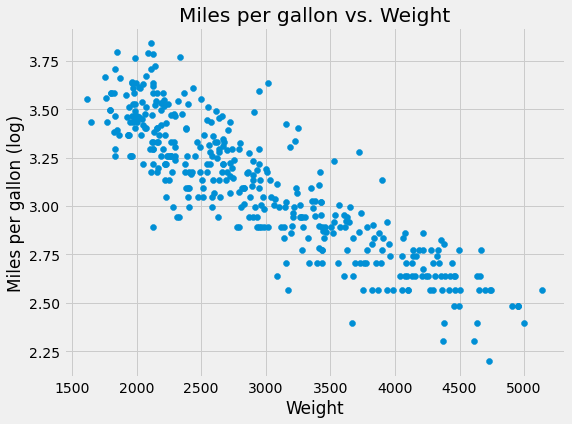

In [273]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))
plt.scatter(data['weight'], data['mpg_log'])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon (log)')
plt.title('Miles per gallon vs. Weight')
plt.savefig('./images/mpg_v_weight_log.png')
plt.show()


In [274]:
# model = sm.formula.ols(formula='mpg_log ~ weight', data=data).fit()
# print(model.summary())

In [275]:
X = data['weight']
y_log = data['mpg_log']

X = sm.add_constant(X)
model = sm.OLS(y_log, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                mpg_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1301.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          3.45e-127
Time:                        14:16:30   Log-Likelihood:                 155.09
No. Observations:                 398   AIC:                            -306.2
Df Residuals:                     396   BIC:                            -298.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1445      0.030    137.818      0.0

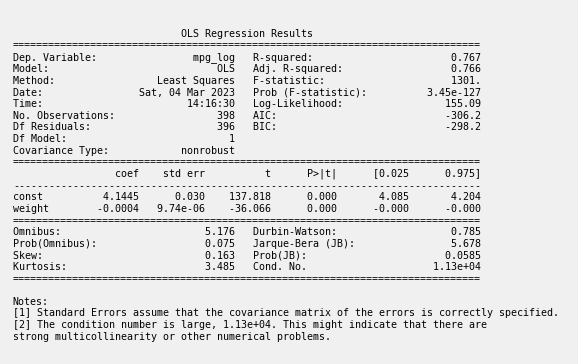

In [276]:
plt.rc('figure', figsize=(9, 6))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
# plt.tight_layout()
plt.savefig('./images/log_output.png')

/Users/rogerlefort/miniforge3/envs/data-analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


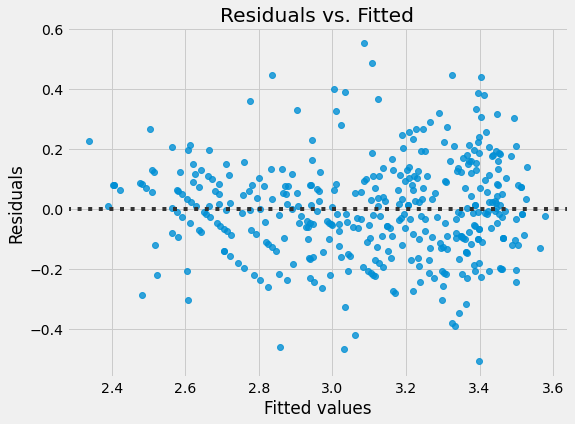

In [277]:
residuals = model.resid
fitted = model.fittedvalues

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))
sns.residplot(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.savefig('./images/log_residuals_v_fitted.png')
plt.show()

In [278]:
bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan Test: p-value = ", bp_test[1])

white_test = het_white(residuals, X)
print("White Test: p-value = ", white_test[1])

# Converting the results of the tests to a dataframe
test_results = pd.DataFrame({'Test': ['Breusch-Pagan', 'White'], 'p-value': [bp_test[1], white_test[1]]})
test_results

Breusch-Pagan Test: p-value =  0.09255949016976972
White Test: p-value =  0.06324925123082863


,Test,p-value
0,Breusch-Pagan,0.092559
1,White,0.063249


In [279]:
dfi.export(test_results, './images/log_test_results.png', max_rows=5)

objc[29017]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x22dd79518) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x10afb3b58). One of the two will be used. Which one is undefined.
[0304/141631.203882:INFO:headless_shell.cc(107)] 43562 bytes written to file /var/folders/6t/_k6kmr152jq69rjlrcg91mb00000gn/T/tmpg_024nbv/temp.png


/Users/rogerlefort/miniforge3/envs/data-analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


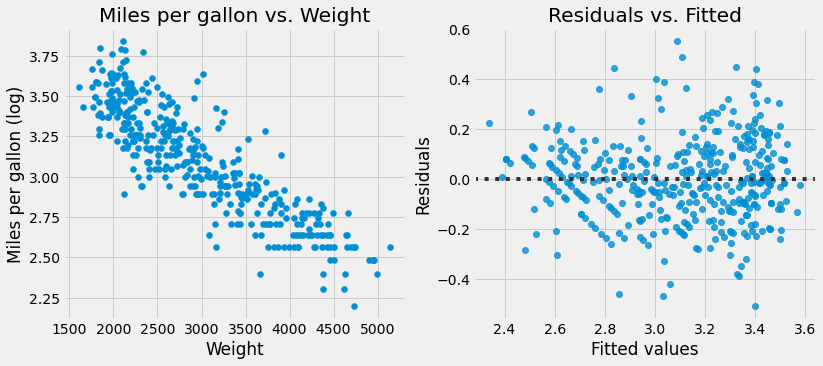

In [280]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(data['weight'], data['mpg_log'])
ax[0].set_xlabel('Weight')
ax[0].set_ylabel('Miles per gallon (log)')
ax[0].set_title('Miles per gallon vs. Weight')

sns.residplot(fitted, residuals, ax=ax[1])
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residuals vs. Fitted')

plt.savefig('./images/log_residuals_v_fitted_combined_scatter.png')
plt.show()

/Users/rogerlefort/miniforge3/envs/data-analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            WLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.977
Model:                            WLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.672e+04
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:16:31   Log-Likelihood:                -1289.7
No. Observations:                 398   AIC:                             2583.
Df Residuals:                     396   BIC:                             2591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6081      0.214    208.071      0.0

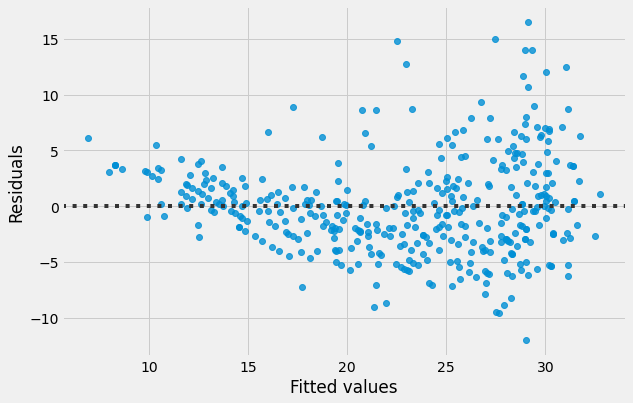

Breusch-Pagan Test: p-value =  9.626665382039294e-07
White Test: p-value =  2.471409081293497e-06


In [281]:
# Using Weighted Least Squares

# wls_model = sm.formula.wls(formula='mpg ~ weight', data=data).fit()

# OLS_weights = 1 / (model.resid ** 2)
wls_weights = 1 / (model.resid ** 2)

X = sm.add_constant(X)
wls_model = sm.WLS(y, X, weights=wls_weights).fit()


print(wls_model.summary())

residuals = wls_model.resid
fitted = wls_model.fittedvalues

sns.residplot(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan Test: p-value = ", bp_test[1])

white_test = het_white(residuals, X)
print("White Test: p-value = ", white_test[1])

In [282]:
# Getting the standard errors of the parameter estimates
std_errors = wls_model.bse
std_errors

const     0.214388
weight    0.000057
dtype: float64

In [283]:
# residuals = model.resid
# fitted = model.fittedvalues

# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(8, 6))
# sns.residplot(fitted, residuals)
# plt.xlabel('Fitted values')
# plt.ylabel('Residuals')
# plt.title('Residuals vs. Fitted')
# plt.show()

In [284]:
# from scipy.stats import chi2

# ols = sm.OLS(y, X).fit()

# def breusch_pagan(resid, x):
#     g     = resid**2 / np.mean(resid**2)
#     ols   = sm.OLS(g, sm.add_constant(x)).fit()
#     beta  = ols.params[1]
#     g_hat = x * beta
#     lm    = 0.5 * g.T @ g_hat
#     pval  = chi2(1).pdf(lm)
#     return lm, pval

# lm, pval = breusch_pagan(ols.resid, X)
# print(lm)                    # 7.7365
# print(pval)                  # 0.0030
# print(f'Reject null? {pval < 0.05}')  # True

In [285]:
# data['mpg'] = data['mpg'] + np.random.normal(0, 8, len(data))

In [286]:
# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(8, 6))
# plt.scatter(data['weight'], data['mpg'])
# plt.xlabel('Weight')
# plt.ylabel('Miles per gallon')
# plt.show()

In [287]:
# X = data['weight']
# Y = data['mpg']
# X = sm.add_constant(X)
# model = sm.OLS(Y,X).fit()
# print(model.summary())

In [288]:
# residuals = model.resid
# fitted = model.fittedvalues

# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(8, 6))
# sns.residplot(fitted, residuals)
# plt.xlabel('Fitted values')
# plt.ylabel('Residuals')
# plt.show()

In [289]:
# bp_test = het_breuschpagan(residuals, X)
# print("Breusch-Pagan Test: p-value = ", bp_test[1])